In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as train_test_split

In [2]:
data=pd.read_csv("sales.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
data.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
data.shape

(200, 4)

In [9]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: ylabel='count'>

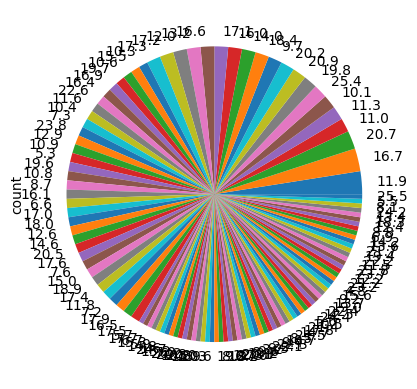

In [14]:
df=data['Sales'].value_counts()
df.plot(kind='pie')

<Axes: >

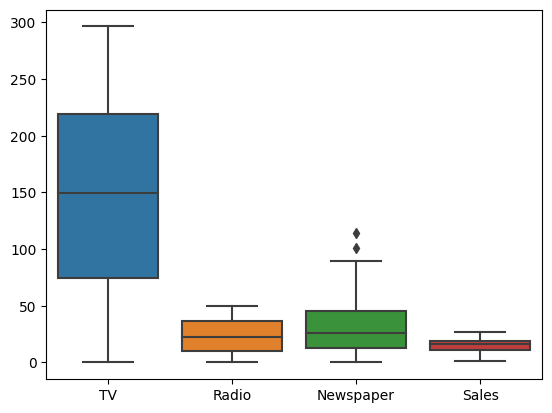

In [16]:
df=data['TV']
sns.boxplot(data)

C:\Users\Chandana A L\AppData\Local\Temp\ipykernel_9792\1655135768.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)


<Axes: ylabel='Density'>

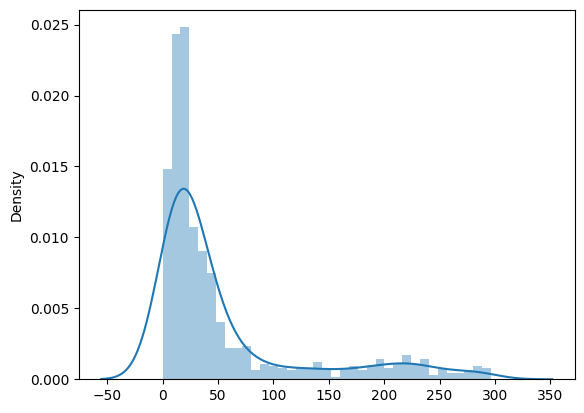

In [17]:
df=data['Radio']
sns.distplot(data)

<Axes: ylabel='Count'>

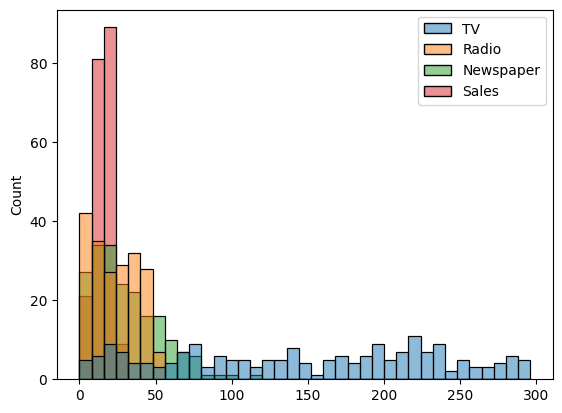

In [18]:
df=data['Newspaper']
sns.histplot(data)

In [19]:
sales=data

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [23]:
X=sales['TV']
sales['TV']=le.fit_transform(X)
sales.head()

,TV,Radio,Newspaper,Sales
0,153,37.8,69.2,22.1
1,32,39.3,45.1,10.4
2,12,45.9,69.3,12.0
3,98,41.3,58.5,16.5
4,112,10.8,58.4,17.9


In [24]:
X=sales['Radio']
sales['Radio']=le.fit_transform(X)
sales.head()

,TV,Radio,Newspaper,Sales
0,153,131,69.2,22.1
1,32,136,45.1,10.4
2,12,156,69.3,12.0
3,98,142,58.5,16.5
4,112,41,58.4,17.9


In [25]:
X=sales['Newspaper']
sales['Newspaper']=le.fit_transform(X)
sales.head()

,TV,Radio,Newspaper,Sales
0,153,131,159,22.1
1,32,136,124,10.4
2,12,156,160,12.0
3,98,142,149,16.5
4,112,41,148,17.9


In [26]:
X=sales['Sales']
sales['Sales']=le.fit_transform(X)
sales.head()

,TV,Radio,Newspaper,Sales
0,153,131,159,106
1,32,136,124,28
2,12,156,160,40
3,98,142,149,66
4,112,41,148,80


<Axes: >

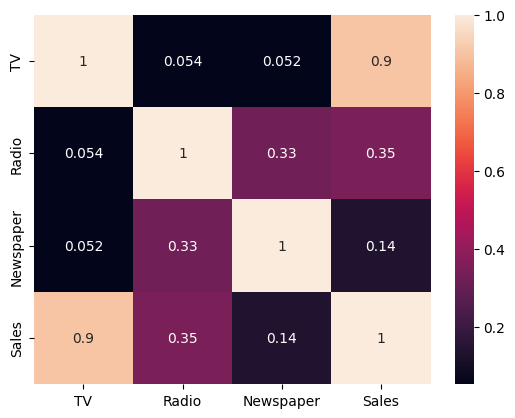

In [28]:
sns.heatmap(sales.corr(), annot=True)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=20)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((160, 3), (40, 3), (160,), (40,))

In [34]:
from sklearn.linear_model import LinearRegression
L_model=LinearRegression()
L_model.fit(xtrain,ytrain)

LinearRegression()

In [35]:
y_prediction=L_model.predict(xtest)
xtest.columns

Index(['TV', 'Radio', 'Newspaper'], dtype='object')

In [36]:
xtest[0:5]

,TV,Radio,Newspaper
150,179,49,109
28,165,93,72
13,67,29,21
178,176,11,77
109,168,92,15


In [37]:
ytest[0:5]

150    64
28     85
13     51
178    69
109    91
Name: Sales, dtype: int64

In [38]:
y_prediction[:5]

array([97.34587783, 98.61610971, 34.18768029, 87.82122519, 99.47095165])

In [39]:
df=[56,1,33,7,0,0,1,0,0]
df=np.array(df).reshape(1,-1)

In [40]:
L_model.predict(df)

C:\Users\Chandana A L\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 9 features, but LinearRegression is expecting 3 features as input.

In [41]:
import gradio as gr

In [46]:
def Sales(TV,Radio,Newspaper,Sales):
    x=np.array([TV,Radio,Newspaper,Sales])
    x=np.array(x).reshape(1,-1)
    prediction=L_model.predict(x)
    prediction=float(prediction)
    return prediction

In [47]:
app=gr.Interface(fn=Sales,inputs=[gr.inputs.Number(label="Sales"),
 gr.inputs.Radio(choices=[1,0],optional=bool,label="TV"),
     gr.inputs.Radio(choices=[1,0],optional=bool,label="Radio"),
    gr.inputs.Radio(choices=[1,0],optional=bool,label="Newspaper"),],       
                outputs="label",
                 title="Developing an ML model for Sales prediction")

C:\Users\Chandana A L\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\inputs.py:59: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
C:\Users\Chandana A L\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
C:\Users\Chandana A L\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\inputs.py:183: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(


In [48]:
app.launch(show_error=True)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


C:\Users\Chandana A L\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
Traceback (most recent call last):
  File "C:\Users\Chandana A L\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\routes.py", line 395, in run_predict
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Chandana A L\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\blocks.py", line 1193, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Chandana A L\AppData\Local\Programs\Python\Python311\Lib\site-packages\gradio\blocks.py", line 916, in call_function
    prediction = await anyio.to_thread.run_sync(
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Chandana A L\AppData\Local\Programs\Python\Python311\Lib

In [49]:
app.close()

Closing server running on port: 7860
